#  Exploring 3D Sinusoidal Data using Artificial Neural Networks

## Directions and Overview

The main purpose of this problem is for you to gain experience using artificial neural networks to solve simple regression problems.  In this problem, you will fit a neural network to a noisy 3D sinusoidal data set.  You will use a `Sequential` model that can be trained very quickly on the supplied data, so I want you to manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the reasonable hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

So, play around and build some models.  When you are done playing with hyperparameter values, you should finish by building an ANN that models the data reasonably well! You should be able to train a model and use it to predict a curve at least as good as mine, but your goal should be to obtain a smoother and less erratic curve.

(Side Note: Achieving a less erratic prediction curve could be done either by building a better model, ___OR___ by sorting the data more intelligently thereby plotting a prediction curve that looks better.  I propose the ideal line is created by sorting the data in such a way that the resulting line minimizes the arc length of the curve. You don't need to worry about any of this, however you do need to generate a figure with a descent-looking prediction curve superimposed on the data.)

Here just just a few of the hyperparameters you can play around with:

- number of nodes per layer
- number of layers
- activation functions
- normalization method (should be negligible)
- number of epochs
- learning rate
- loss function

You will know that you have obtained a reasonable model when the model's prediction curve looks reasonable.  ___Below you will be asked to plot the model's prediction curve along with the training data.  Even if you correctly train the model, you may find that your trendline looks totally crazy and out-of-this-world when you first plot it.  If this happens to you, try plotting the model's predictions using a scatter plot rather than a connected line plot.  You should be able to infer the problem and solution with plotting the trendline from examining this new scatter plot of the model's predictions.___  

Lastly in this assignment, you will compute the generalization error on the test set.

## Preliminaries

Let's import some common packages:

In [ ]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os
import warnings
warnings.filterwarnings('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot3Ddata(data_df):
    fig = plt.figure(figsize = (18, 16))
    ##
    ax1 = fig.add_subplot(2,2,1,projection='3d')
    ax1.scatter3D(data_df['x'],data_df['y'],data_df['z'], color = "cornflowerblue")
    ax1.view_init(elev=0, azim=90)
    ax1.set_xlabel('x',color='firebrick')
    ax1.set_ylabel('y',color='firebrick')
    ax1.set_ylim(-1.8,1.8)
    ax1.set_zlabel('z',color='firebrick')
    ##
    ax2 = fig.add_subplot(2,2,2,projection='3d')
    ax2.scatter3D(data_df['x'],data_df['y'],data_df['z'], color = "royalblue")
    ax2.view_init(elev=30, azim=0)
    ax2.set_xlabel('x',color='firebrick')
    ax2.set_ylabel('y',color='firebrick')
    ax2.set_ylim(-1.8,1.8)
    ax2.set_zlabel('z',color='firebrick')
    ##
    ax3 = fig.add_subplot(2,2,3,projection='3d')
    ax3.scatter3D(data_df['x'],data_df['y'],data_df['z'], color = "royalblue")
    ax3.view_init(elev=40, azim=90)
    ax3.set_xlabel('x',color='firebrick')
    ax3.set_ylabel('y',color='firebrick')
    ax3.set_ylim(-1.8,1.8)
    ax3.set_zlabel('z',color='firebrick')
    ##
    ax4 = fig.add_subplot(2,2,4,projection='3d')
    ax4.scatter3D(data_df['x'],data_df['y'],data_df['z'], color = "royalblue")
    ax4.view_init(elev=-92, azim=-270)
    ax4.set_xlabel('x',color='firebrick')
    ax4.set_ylabel('y',color='firebrick')
    ax4.set_ylim(-1.8,1.8)
    ax4.set_zlabel('z',color='firebrick')

    
def plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z):
    fig = plt.figure(figsize = (20, 14))
    ax1 = fig.add_subplot(2,2,1,projection='3d')
    ax1.scatter3D(scat_x, scat_y, scat_z, color = 'royalblue')
    ax1.plot(fit_x, fit_y, fit_z,color = 'black',linewidth = 1)
    ax1.view_init(elev=0, azim=90)
    ax1.set_xlabel('x',color='firebrick')
    ax1.set_ylabel('y',color='firebrick')
    ax1.set_ylim(-1.8,1.8)
    ax1.set_zlabel('z',color='firebrick')
    ##
    ax2 = fig.add_subplot(2,2,2,projection='3d')
    ax2.scatter3D(scat_x, scat_y, scat_z, color = 'royalblue')
    ax2.plot(fit_x, fit_y, fit_z,color = 'black',linewidth = 1)
    ax2.view_init(elev=30, azim=0)
    ax2.set_xlabel('x',color='firebrick')
    ax2.set_ylabel('y',color='firebrick')
    ax2.set_ylim(-1.80,1.80)
    ax2.set_zlabel('z',color='firebrick')
    ##
    ax3 = fig.add_subplot(2,2,3,projection='3d')
    ax3.scatter3D(scat_x, scat_y, scat_z, color = 'royalblue')
    ax3.plot(fit_x, fit_y, fit_z,color = 'black',linewidth = 1)
    ax3.view_init(elev=40, azim=90)
    ax3.set_xlabel('x',color='firebrick')
    ax3.set_ylabel('y',color='firebrick')
    ax3.set_ylim(-1.8,1.8)
    ax3.set_zlabel('z',color='firebrick')
    ##
    ax4 = fig.add_subplot(2,2,4,projection='3d')
    ax4.scatter3D(scat_x, scat_y, scat_z, color = 'royalblue')
    ax4.plot(fit_x, fit_y, fit_z,color = 'black',linewidth = 1)
    ax4.view_init(elev=-92, azim=-270)
    ax4.set_xlabel('x',color='firebrick')
    ax4.set_ylabel('y',color='firebrick')
    ax4.set_ylim(-1.8,1.8)
    ax4.set_zlabel('z',color='firebrick')



# Import, Split and Standardize Data

Complete the following:



1. Begin by importing the data from the file called `3DSinusoidalANN.csv`.  Name the returned DataFrame `data`.

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. Looking at the below graph, it makes sense for `x` and `z` to be your training data and `y` to be your response data.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).

3. Next, use the `StandardScaler()` to scale your data.

In [ ]:
#read the data with pandas
data = pd.read_csv("3DSinusoidalANN.csv")

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data[['x','z']], data['y'], test_size = 0.2, random_state = 42)

In [ ]:
#Scaling train data (x,z coordinate)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
#convert series to numpy array for scaling purpose
y_train=y_train.to_numpy()

In [ ]:
#fixing the dimension for scaling purpose
y_train = y_train.reshape(len(y_train), 1)
#scaling 
scaler.fit(y_train)
# transform training dataset(y coordinate)
y_train = scaler.fit_transform(y_train)

# Plot Data

Simply plot your training data here, so that you know what you are working with.  You must define a function called `plot3Ddata`, which accepts a Pandas DataFrame (composed of 3 spatial coordinates) and uses `scatter3D()` to plot the data.  Use this function to plot only the training data (recall that you don't even want to look at the test set, until you are ready to calculate the generalization error).  You must place the definition of this function in the existing code cell of the above __Preliminaries__ section, and have nothing other than the function invocation in the below cell. 

You must emulate the graphs shown in the respective sections below. Each of the graphs will have four subplots. Note the various viewing angles that each subplot presents - you can achieve this with the view_init() method. Be sure to label your axes as shown.

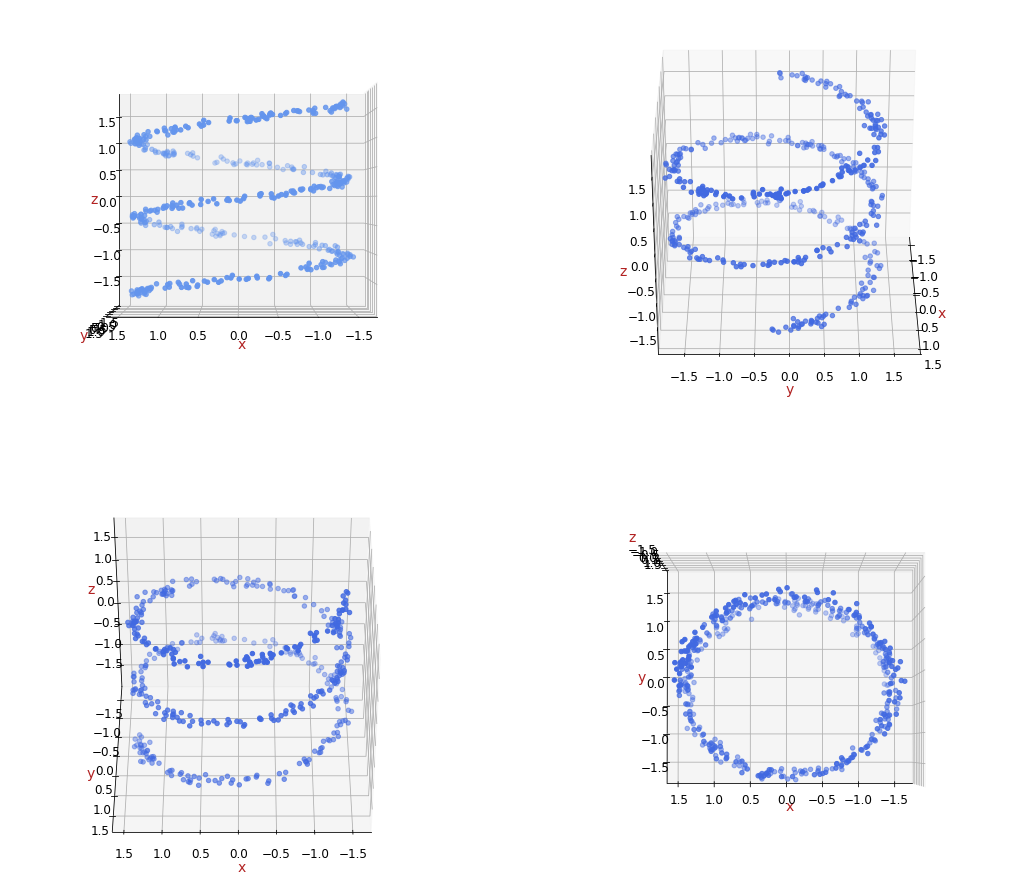

In [ ]:
#creating training data frame for plotting
frames = [pd.DataFrame(X_train, columns=['x','z']), pd.DataFrame(y_train,columns=['y'])]
train_df = pd.concat(frames, axis=1)
train_df
plot3Ddata(train_df) 

## A Quick Note

In the following sections you will be asked to plot the training data along with the model's predictions for that data superimposed on it.  You must write a function called `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` that will plot this figure.  The function accepts six parameters as input, shown in the function signature.  All six input parameters must be NumPy arrays.  The three Numpy arrays called `fit_x, fit_y,` and  `fit_z` represent the x, y, and z coordinates of the model predictions (i.e. the prediction curve).  The three Numpy arrays called `scat_x, scat_y,` and  `scat_z` represent the x, y, and z coordinates of the training data.   

You must place the definition of the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function in the existing code cell of the above __Preliminaries__ section. (The function header is already there - you must complete the function definition.)  You will use the `plotscatter3Ddata()` function in the following section.

# Explore 3D Sinusoidal Data with Artifical Neural Networks

Fit a `Sequential` model to this data.  You must manually assign values to the hyperparameters, including the number of nuerons per layer and the number of layers.  You should "play around" by using different combinations of hyperparameter values.  When you are done playing, you should build an ANN that models the data well.  Then, you will use that modelto calculate the generalization error in the subsequent section.

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

#import tensorflow and keras
from tensorflow import keras
from tensorflow.keras import layers

#construct a sequential model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[2]),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1),
])

#selecting optimizer,learning rare & compiling
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt ,loss=keras.losses.MeanSquaredError())

#model fitting
history = model.fit(
    X_train, y_train,
    batch_size=60,
    epochs=102,
    verbose=0, # hide the output because we have so many epochs
)

#create a dataframe for checking history
history_df = pd.DataFrame(history.history)

In [ ]:
#history of losses
history_df

,loss
0,1.093004
1,0.976091
2,0.925075
3,0.794415
4,0.697340
...,...
97,0.019992
98,0.021573
99,0.021241
100,0.019185


### Plot Model Predictions for Training Set

Use the model's `predict()` method to make a prediction for `y` using the `x` and `z` training data.  Use the `plotscatter3Ddata(fit_x, fit_y, fit_z, scat_x, scat_y, scat_z)` function to plot the data and the prediction curve.

In [ ]:
#prediction for train data
prediction = model.predict(X_train)
#change dimension for plotting
prediction = prediction.reshape(448,)

In [ ]:
#get sorting indices for value sorting for prediction curve
sorted_indices = np.argsort(train_df['z'])
x = train_df['x'][sorted_indices]
z = train_df['z'][sorted_indices]

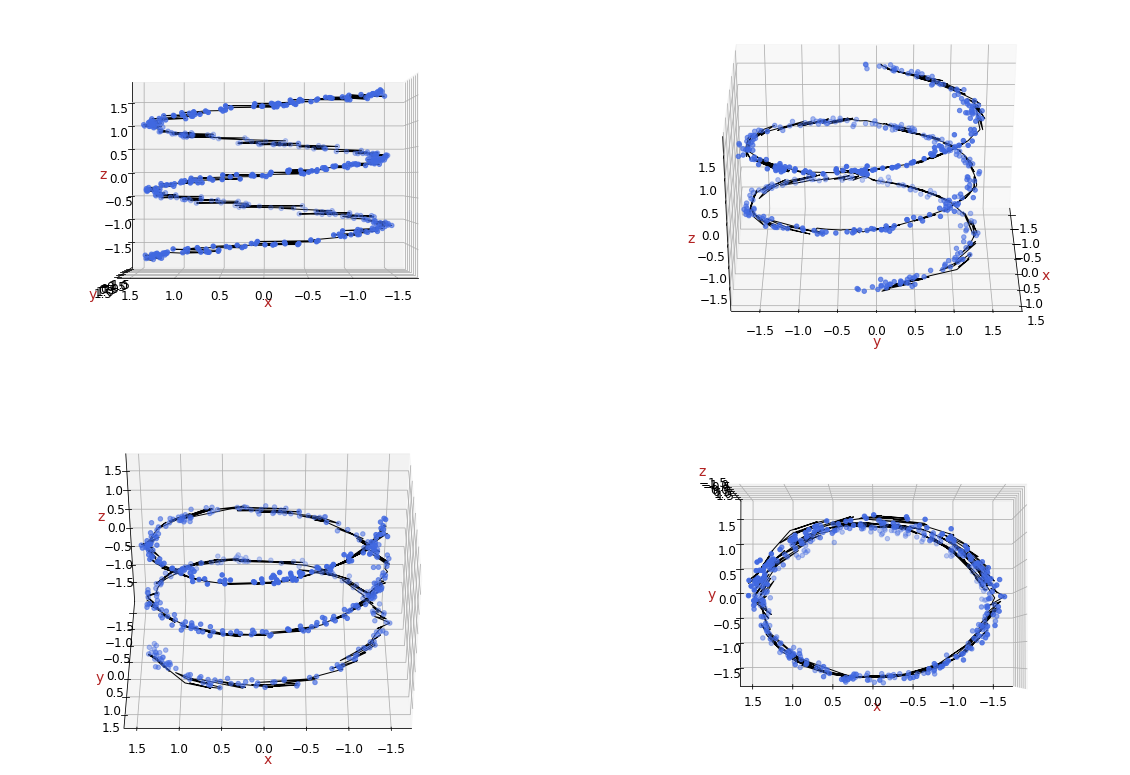

In [ ]:
#plot prediction curve on the scattered training data
plotscatter3Ddata(x,prediction[sorted_indices],z ,train_df['x'], train_df['y'], train_df['z'])

# Compute Generalization Error

Compute the generalization error and use MSE as the generalization error metric.  Round your answers to four significant digits.  Print the generalization error for the model.

In [ ]:
#getting prediction with final test data
y_preds = model.predict(X_test)

In [ ]:
#Generalization Error with MSE
mse = keras.losses.MeanSquaredError()
print("Generalization error for the test data is: " , mse(y_test, y_preds).numpy())

Generalization error for the test data is:  47.826653
